In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_table('/content/fruit_data_complete (1).txt')

In [ ]:
data.shape

(59, 7)

In [ ]:
data.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [ ]:
data.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
look_up_fruit=dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))

In [ ]:
look_up_fruit

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
X=data[['mass', 'width', 'height']]
y=data['fruit_label']

In [ ]:
print(X.shape)
print(y.shape)

(59, 3)
(59,)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(44, 3)

In [ ]:
y_train.shape

(44,)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict=knn.predict(X_test)
y_correct=np.array(y_test)
print(np.concatenate((y_predict.reshape(len(y_predict), 1), y_correct.reshape(len(y_correct),1)),axis=1))

[[3 3]
 [1 3]
 [4 4]
 [4 3]
 [1 1]
 [1 1]
 [3 3]
 [3 4]
 [1 3]
 [4 1]
 [2 2]
 [1 1]
 [3 3]
 [1 3]
 [4 3]]


In [ ]:
knn.score(X_test, y_test)

0.5333333333333333

In [ ]:
knn.score(X_train, y_train)

0.7954545454545454

In [ ]:
conf_mat=confusion_matrix(y_test, y_predict)
print(conf_mat)

[[3 0 0 1]
 [0 1 0 0]
 [3 0 3 2]
 [0 0 1 1]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.6

In [ ]:
fruit1_new = np.array([[100, 6.3, 8.5]])


In [ ]:
prediction1 = knn.predict(fruit1_new)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
look_up_fruit[prediction1[0]]

'mandarin'

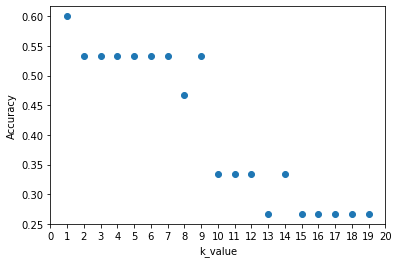

In [ ]:
k_range = range(1,20)
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(X_train, y_train)
 scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,21));


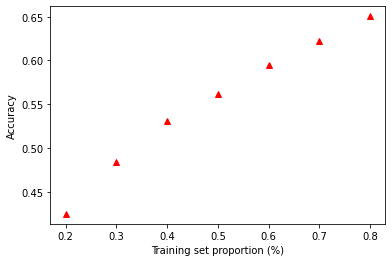

In [ ]:
t = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
knn = KNeighborsClassifier(n_neighbors = 3)
plt.figure()
for split in t:
  scores = []
  for i in range(1,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
  plt.plot(split, np.mean(scores), 'r^')
plt.xlabel('Training set proportion (%)')
plt.ylabel('Accuracy');